#I. Perkenalan
Nama : Hafidz Muta'ali

Batch : FTDS 006

Telco Customer Churn


---

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers – gender, age range, and if they have partners and dependents

#II. Import Pustaka

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix , classification_report

#III Data Loading

In [ ]:
dfraw=pd.read_csv('https://raw.githubusercontent.com/hafidzali04/Hacktiv8-phase0/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
dfraw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#IV Data Cleaning

In [ ]:
#Drop customer ID
dfraw = dfraw.drop('customerID', axis = 1)
dfraw.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dfraw.info() #Check Tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#Check Duplicate
dfraw.duplicated().sum()

22

In [ ]:
dfraw = dfraw.drop_duplicates(keep='first') #Menghapus data duplicate
dfraw.reset_index(drop = True, inplace = True)
dfraw.shape

(7021, 20)

In [ ]:
#Check Missing Values
dfraw.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# count values of numerical columns
for column in dfraw.select_dtypes(include=['int64','float64']).columns:
    print(column)
    print(dfraw[column].value_counts())
    print('\n')

SeniorCitizen
0    5880
1    1141
Name: SeniorCitizen, dtype: int64


tenure
1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


MonthlyCharges
20.05     59
19.85     45
19.95     44
20.00     43
19.90     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
35.30      1
Name: MonthlyCharges, Length: 1585, dtype: int64




In [ ]:
# count values of categorical columns
for column in dfraw.select_dtypes(include=['object']).columns:
    print(column)
    print(dfraw[column].value_counts())
    print('\n')

gender
Male      3541
Female    3480
Name: gender, dtype: int64


Partner
No     3619
Yes    3402
Name: Partner, dtype: int64


Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64


PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64


MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64


TechSupport
No                     3465
Yes                    2044
No internet servi

* bisa dilihat pada colom total charges ternyata teradapat 11 values yang kosong

In [ ]:
dfraw['TotalCharges'] = dfraw['TotalCharges'].replace(' ', np.nan, regex=True)
dfraw['TotalCharges'] = pd.to_numeric(dfraw['TotalCharges'])

In [ ]:
#Missing values totalcharges
dfraw['TotalCharges'] = dfraw['TotalCharges'].fillna(dfraw.TotalCharges.median())

In [ ]:
dfclean = dfraw.copy()

#V EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


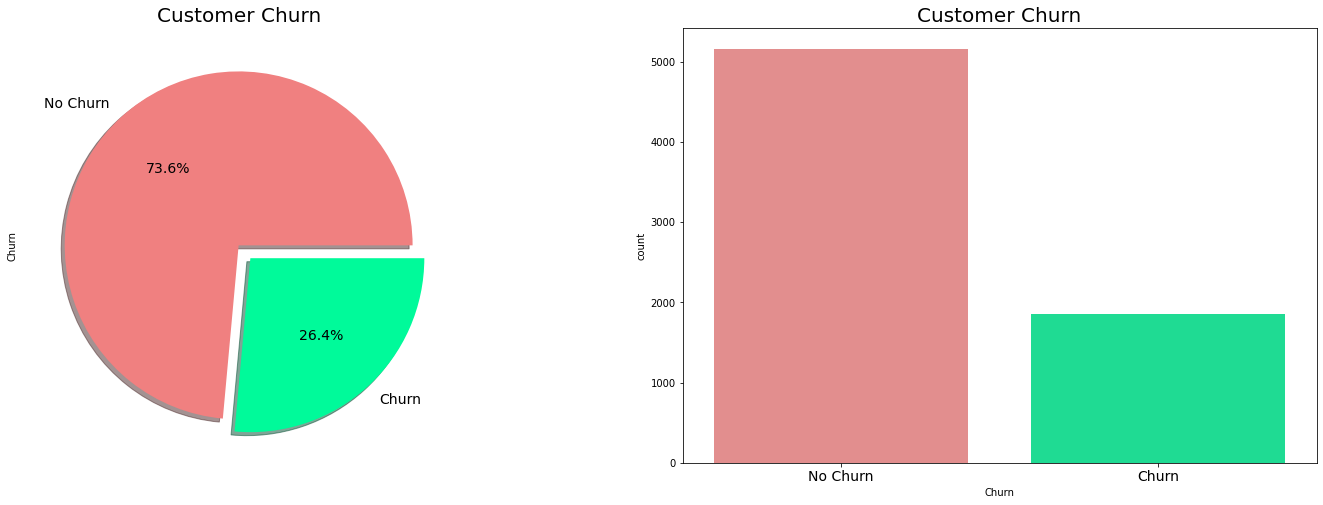

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,8))
colors=["#F08080", "#00FA9A"]
labels = 'No Churn', 'Churn'
dfclean['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Customer Churn', fontsize=20)
sns.countplot('Churn',data=dfclean,ax=ax[1], palette=colors)
ax[1].set_title('Customer Churn', fontsize=20)
ax[1].set_xticklabels(['No Churn', 'Churn'], fontsize=14)
plt.show()

* Dari grafik diatas bisa dilihat pesebaran data tidak terlalu imbalance

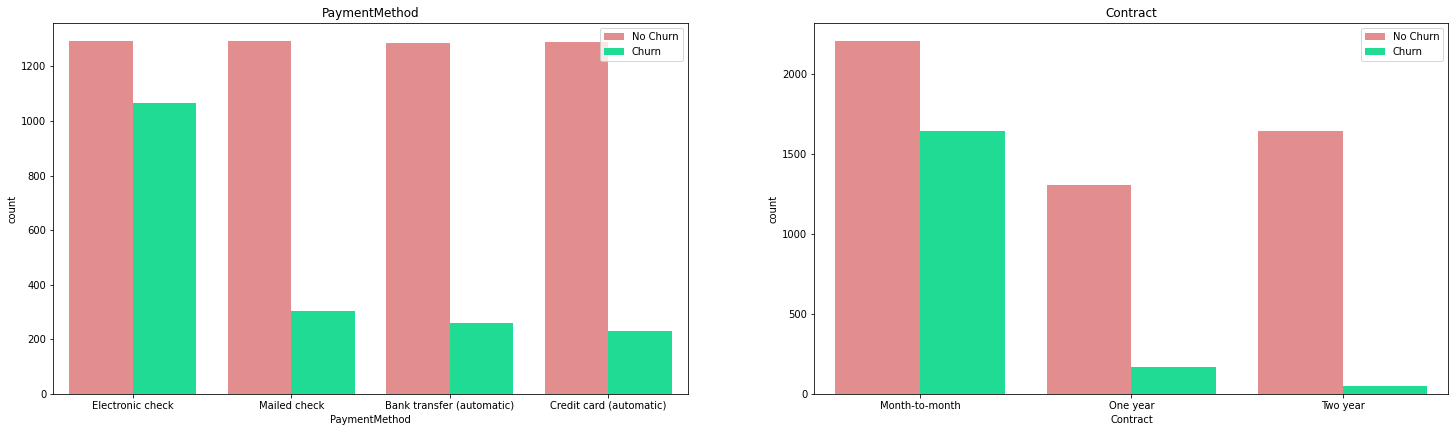

In [ ]:
plt.figure(figsize=(25,15))
x=dfclean[['PaymentMethod', 'Contract']]
for i, col in enumerate(list(x.columns)):
    i += 1
    plt.subplot(2,2,i)
    sns.countplot(x = x[col], hue = dfclean['Churn'], palette=colors)
    plt.legend(['No Churn', 'Churn'])
    plt.title(col)

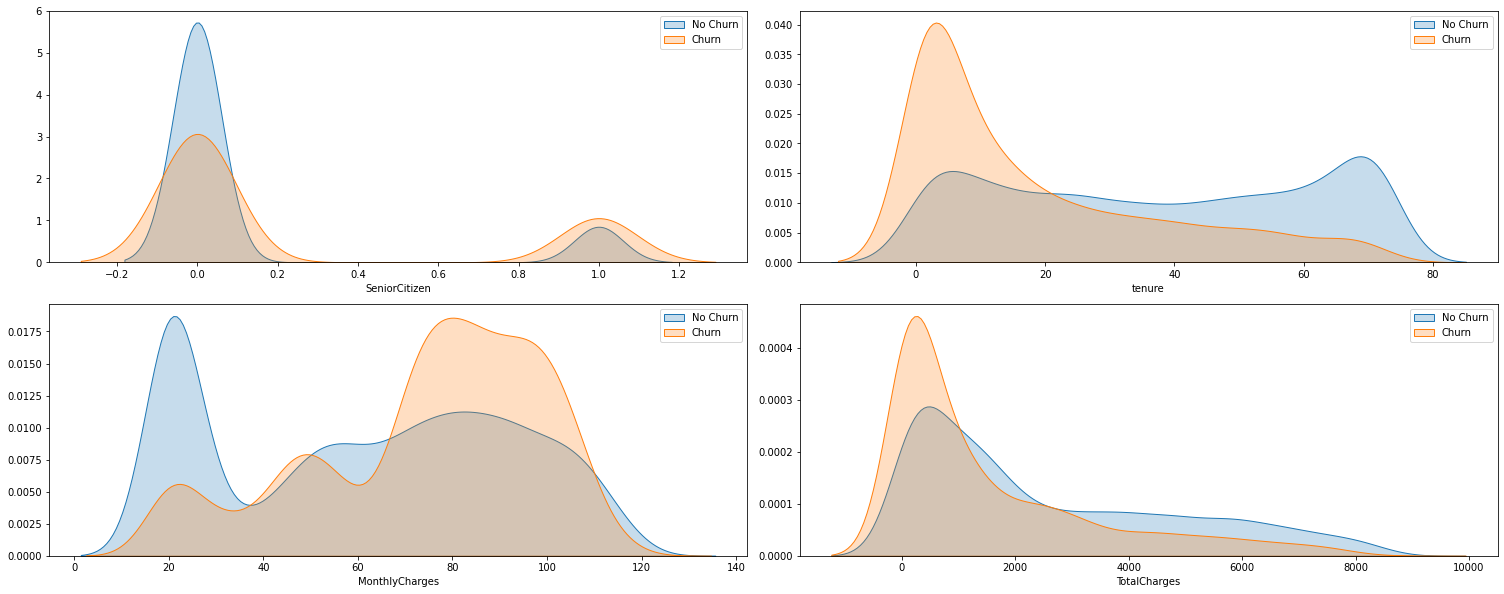

In [ ]:
plt.figure(figsize=(21,12))
num = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
for i,col in enumerate(num):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(dfclean.loc[(dfclean['Churn'] == 'No'), col], label = 'No Churn', shade = True)
    sns.kdeplot(dfclean.loc[(dfclean['Churn'] == 'Yes'), col], label = 'Churn', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()

* Dari grafik diatas dapat dilihat dalam kolom tenure, pelanggan yang churn cenderung memliki tenure rendah 
* Pelanggan yang churn cenderung memiliki totalcharges antara 0 - 2000
* Bisa disimpulkan jika dari kedua kolom diatas cenderung pelanggan baru yang banyak churn
* Untuk MonthlyCharges pelanggan yang membayar lebih murah cenderung tidak churn

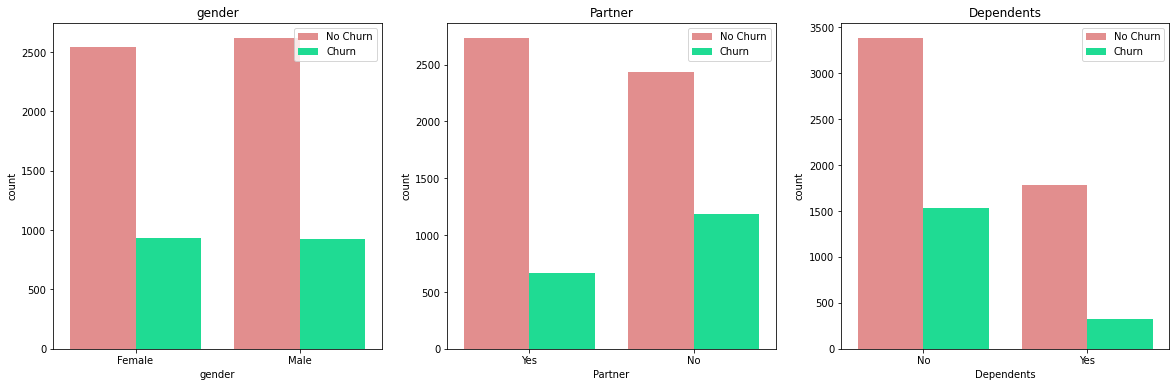

In [ ]:
plt.figure(figsize=(20,6))

for i, col in enumerate(list( dfclean[['gender', 'Partner', 'Dependents']].columns)):
    i += 1
    plt.subplot(1,3,i)
    sns.countplot(x =  dfclean[['gender', 'Partner', 'Dependents']][col], hue = dfclean['Churn'], palette=colors)
    plt.legend(['No Churn', 'Churn'])
    plt.title(col)

Dari Demographic info diatas bisa diambil kesimpulan bahwa:
* Data churn lebih banyak yang tidak memiliki partner 
* Data churn lebih banyak yang No Dependents (tidak memiliki tanggungan)
* Data churn antara female dan male balance

In [ ]:
dfraw.select_dtypes(include=['object']).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

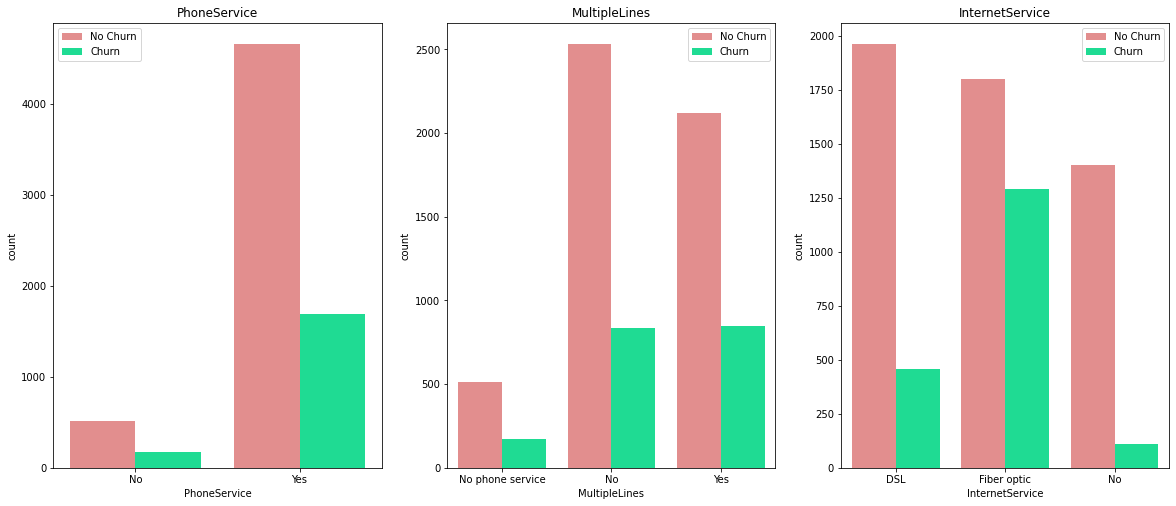

In [ ]:
plt.figure(figsize=(20,18))
phone=dfclean[['PhoneService', 'MultipleLines','InternetService']]
for i, col in enumerate(list(phone.columns)):
    i += 1
    plt.subplot(2,3,i)
    sns.countplot(x = phone[col], hue = dfclean['Churn'], palette=colors)
    plt.legend(['No Churn', 'Churn'])
    plt.title(col)

Dari data diatas pelanggan churn banyak yang memiliki phoneservice dan internetservice menggunakan fiber optic

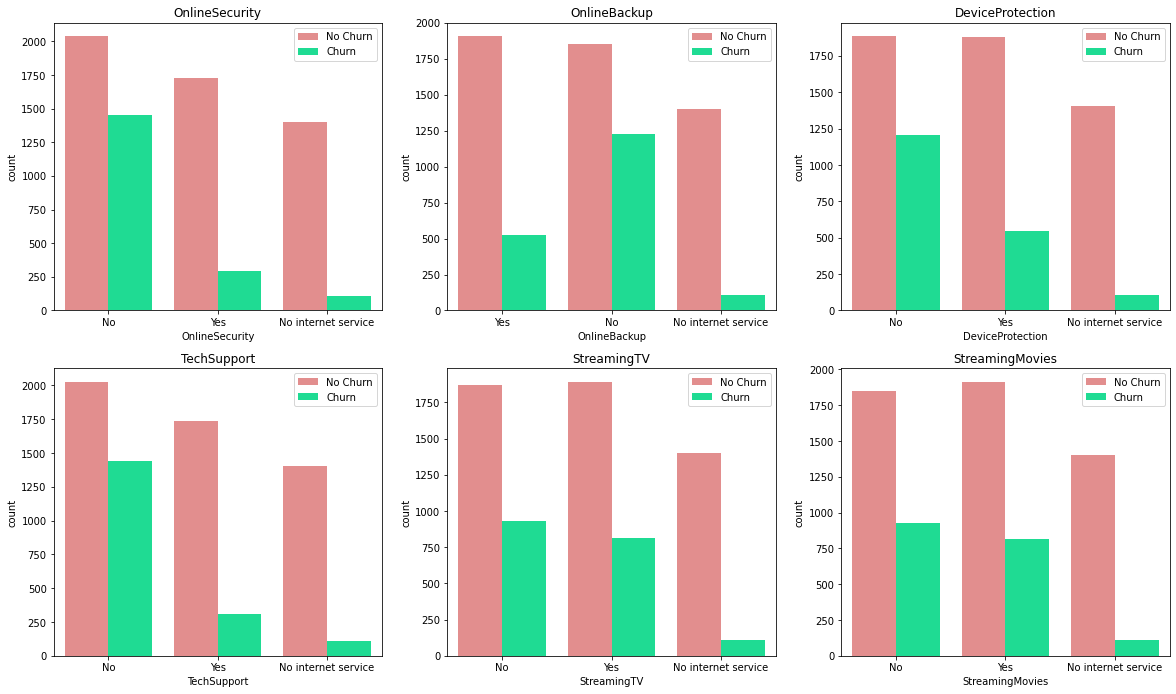

In [ ]:
plt.figure(figsize=(20,18))
secure=dfclean[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']]
for i, col in enumerate(list(secure.columns)):
    i += 1
    plt.subplot(3,3,i)
    sns.countplot(x = secure[col], hue = dfclean['Churn'], palette=colors)
    plt.legend(['No Churn', 'Churn'])
    plt.title(col)

* Jika dilihat dari fitur service pelanggan yang churn cenderung yang tidak memiliki onlinesecurity,onlinebackup, deviceprotection, dan techsupport
* Jika dilihat dari fitur Stream pelanggan yang churn cenderung tidak memiliki StreamingTV dan StreamingMovies


In [ ]:
#Convert all the Categorical columns to numerical data types
for column in dfclean.columns:
    if dfclean[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    dfclean[column] = LabelEncoder().fit_transform(dfclean[column])
dfclean.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


(7021, 20)

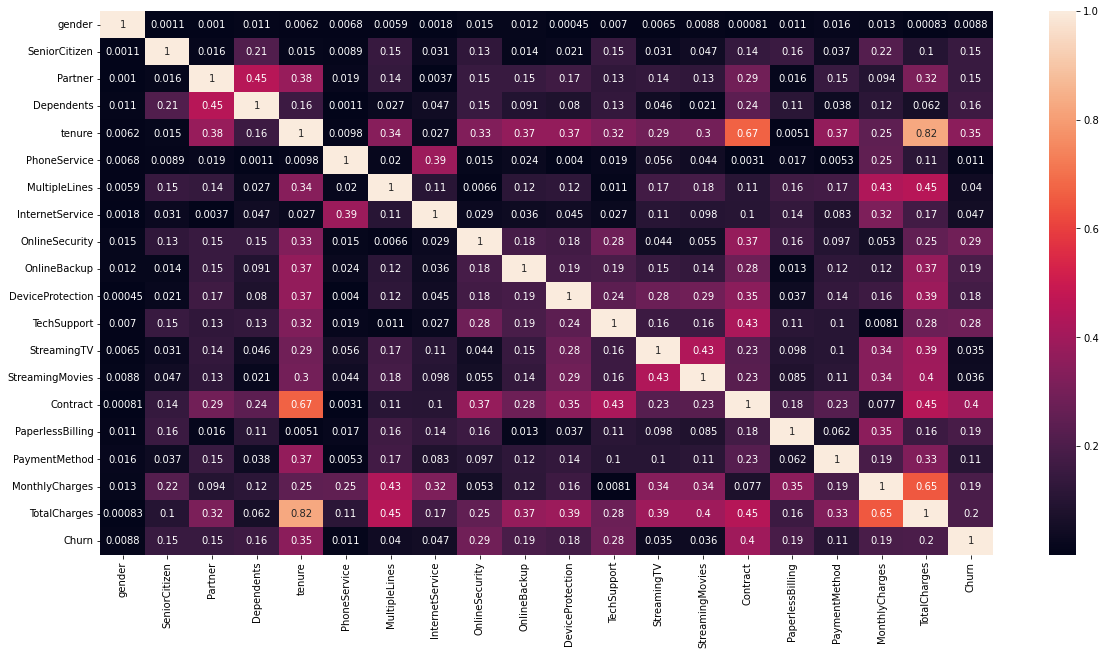

In [ ]:
#heatmap untuk pengecekan correlation
plt.figure(figsize=(20, 10))
sns.heatmap(dfclean.corr().abs(),  annot=True)
plt.show()

* Berdasarkan korelasi data, korelasi tertinggi terhadap colom churn ada pada colom tenure, sedangkan yang terendah ada pada colom Gender
* Dari hasi korelasi disini akan di drop kolom dengan korelasi <0.1

In [ ]:
#Drop kolom dengan korelasi < 0.1
dfclean = dfclean.drop(['gender', 'PhoneService' , 'MultipleLines' ,'InternetService', 'StreamingTV','StreamingMovies'], axis = 1)
dfclean.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1


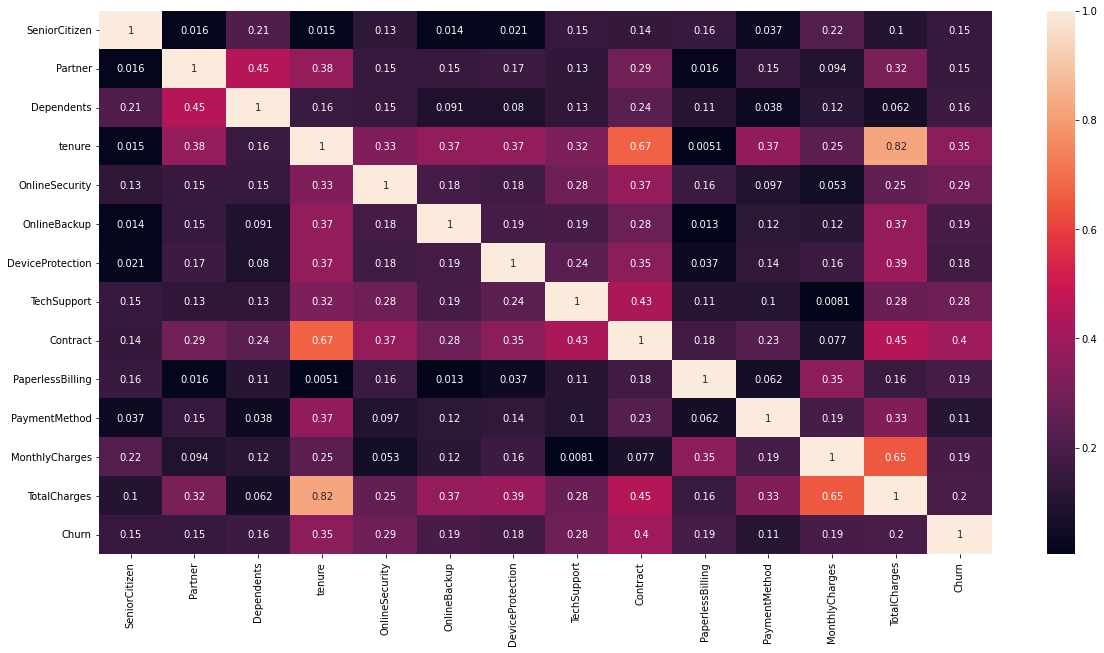

In [ ]:
#heatmap untuk pengecekan correlation
plt.figure(figsize=(20, 10))
sns.heatmap(dfclean.corr().abs(),  annot=True)
plt.show()

#VI Data Preprocessing

In [ ]:
X = dfclean.drop('Churn', axis = 1) #Fitur
y = dfclean['Churn'] #Target

In [ ]:
#Split Data menjadi 3 bagian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42, shuffle=True, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2,random_state = 42, shuffle=True,stratify = y_train)

print('Presentase untuk data training   :', '%.1f' % ((len(X_train)/len(X))*100), '%')
print('Presentase untuk data evaluation :', '%.1f' % ((len(X_val)/len(X))*100), '%')
print('Presentase untuk data test       :', '%.1f' % ((len(X_test)/len(X))*100), '%')
print()

print('Jumlah data training  :', X_train.shape[0])
print('Jumlah data validation:', X_val.shape[0])
print('Jumlah data test      :', X_test.shape[0])

Presentase untuk data training   : 72.0 %
Presentase untuk data evaluation : 18.0 %
Presentase untuk data test       : 10.0 %

Jumlah data training  : 5054
Jumlah data validation: 1264
Jumlah data test      : 703


##Transform Data

In [ ]:
tf.convert_to_tensor(X_train)
tf.convert_to_tensor(X_val)
tf.convert_to_tensor(X_test)

<tf.Tensor: shape=(703, 13), dtype=float64, numpy=
array([[0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        5.96000e+01, 2.97030e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        6.95000e+01, 2.62525e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        1.00000e+02, 1.53475e+03],
       ...,
       [0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 2.00000e+00,
        2.00000e+01, 5.40050e+02],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        1.00000e+02, 4.21155e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        9.46500e+01, 6.74735e+03]])>

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1, input_dim=13)
normalizer.adapt(X_train)
normalizer.adapt(X_val)
normalizer.adapt(X_test)

In [ ]:
#Pake ini hasil jelek banget
#X_train_tensor = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#X_val_tensor = tf.data.Dataset.from_tensor_slices((X_val, y_val))
#X_test_tensor = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
#scaler = Pipeline([('scaler', StandardScaler())])

In [ ]:
#class OldDataFrameSelector(BaseEstimator, TransformerMixin):
#    def __init__(self, attribute_names):
#        self.attribute_names = attribute_names
#    def fit(self, X, y=None):
#        return self
#    def transform(self, X):
#        return X[self.attribute_names]

In [ ]:
# Membuat pipeline untuk kolom numerik
#numerical_pipeline = Pipeline([
#    ('select_numeric', OldDataFrameSelector(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
#                                            'MonthlyCharges', 'TotalCharges'])),
#    ('scaler', StandardScaler()),
#])

# Membuat pipeline untuk kolom kategorikal
#categorical_pipeline = Pipeline([
#    ('select_cat', OldDataFrameSelector(['gender', 'PhoneService', 'MultipleLines', 'InternetService',
#                                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#                                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])),
#    ('cat_encoder', OneHotEncoder(sparse=False))
#])

# Menggabungkan kedua pipelines
#preprocess_pipeline = FeatureUnion(transformer_list=[
#        ('numerical_pipeline', numerical_pipeline),
#       ('categorical_pipeline', categorical_pipeline),
#    ])

In [ ]:
#X_train = scaler.fit_transform(X_train)
#X_train.shape

(5054, 13)

In [ ]:
#X_val = scaler.fit_transform(X_val)
#X_val.shape

(1264, 13)

In [ ]:
#X_test = scaler.fit_transform(X_test)
#X_test.shape

(703, 13)

#VII Pendefisian Model

##Artificial Neural Network - Sequential API

In [ ]:
keras.backend.clear_session()

In [ ]:
#X_train_batches = X_train_tensor.shuffle(1000).batch(10)
#X_val_batches = X_val_tensor.shuffle(1000).batch(10)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
seq = tf.keras.Sequential([     
   normalizer,                                      
   tf.keras.layers.Dense(48, activation='relu'),
   tf.keras.layers.Dense(32, activation='relu'), 
   tf.keras.layers.Dense(1, activation='sigmoid')                         
])

seq.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = seq.fit(X_train,y_train , epochs=100, verbose = 1, batch_size=5,
                    validation_data = (X_val,y_val), callbacks=[early_stop])

Epoch 1/100
1011/1011 [==============================] - 5s 3ms/step - loss: 0.5049 - accuracy: 0.7608 - val_loss: 0.4454 - val_accuracy: 0.7903
Epoch 2/100
1011/1011 [==============================] - 3s 3ms/step - loss: 0.4458 - accuracy: 0.7812 - val_loss: 0.4297 - val_accuracy: 0.7959
Epoch 3/100
1011/1011 [==============================] - 3s 3ms/step - loss: 0.4350 - accuracy: 0.7885 - val_loss: 0.4252 - val_accuracy: 0.8038
Epoch 4/100
1011/1011 [==============================] - 3s 3ms/step - loss: 0.4302 - accuracy: 0.7909 - val_loss: 0.4227 - val_accuracy: 0.8054
Epoch 5/100
1011/1011 [==============================] - 3s 3ms/step - loss: 0.4270 - accuracy: 0.7946 - val_loss: 0.4214 - val_accuracy: 0.8030
Epoch 6/100
1011/1011 [==============================] - 3s 3ms/step - loss: 0.4247 - accuracy: 0.7974 - val_loss: 0.4203 - val_accuracy: 0.8014
Epoch 7/100
1011/1011 [==============================] - 3s 3ms/step - loss: 0.4228 - accuracy: 0.7980 - val_loss: 0.4202 - val_ac

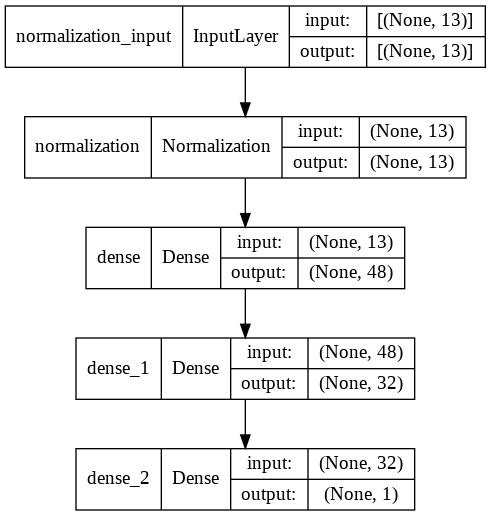

In [ ]:
keras.utils.plot_model(seq, show_shapes=True)

In [ ]:
seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 48)                672       
                                                                 
 dense_1 (Dense)             (None, 32)                1568      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,300
Trainable params: 2,273
Non-trainable params: 27
_________________________________________________________________


In [ ]:
seq.evaluate(X_train, y_train)

158/158 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8071


[0.4055911898612976, 0.8070834875106812]

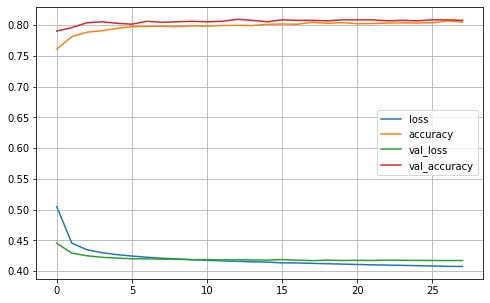

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
pred = seq.predict(X_train)
yseq = []
for element in pred:
    if element > 0.5:
        yseq.append(1)
    else :
        yseq.append(0)

In [ ]:
print(classification_report(y_train, yseq))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3717
           1       0.66      0.55      0.60      1337

    accuracy                           0.81      5054
   macro avg       0.76      0.73      0.74      5054
weighted avg       0.80      0.81      0.80      5054



##Artificial Neural Network - Functional API

In [ ]:
input_ = keras.layers.Input(shape=(13,))
normalizer_ = tf.keras.layers.Normalization(axis=-1)(input_)
hidden1 = keras.layers.Dense(48, activation="relu")(normalizer_)
hidden2 = keras.layers.Dense(32, activation="relu")(hidden1)
output = keras.layers.Dense(1,activation="sigmoid")(hidden2)
func = keras.models.Model(inputs=[input_], outputs=[output])

func.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics = ['accuracy'])

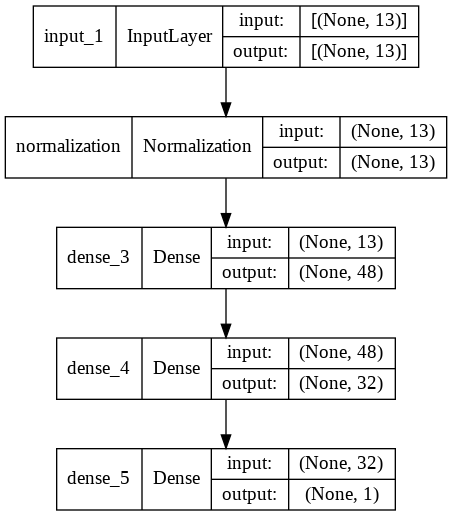

In [ ]:
keras.utils.plot_model(func, show_shapes=True)

In [ ]:
history = func.fit(X_train, y_train, epochs=100, verbose = 1,
                    validation_data = (X_val, y_val), callbacks=[early_stop])

Epoch 1/100
158/158 [==============================] - 1s 4ms/step - loss: 3.6319 - accuracy: 0.6516 - val_loss: 0.5240 - val_accuracy: 0.7231
Epoch 2/100
158/158 [==============================] - 1s 3ms/step - loss: 0.5500 - accuracy: 0.7218 - val_loss: 0.5140 - val_accuracy: 0.7358
Epoch 3/100
158/158 [==============================] - 1s 4ms/step - loss: 0.5304 - accuracy: 0.7329 - val_loss: 0.4858 - val_accuracy: 0.7429
Epoch 4/100
158/158 [==============================] - 1s 4ms/step - loss: 0.5971 - accuracy: 0.7293 - val_loss: 0.4796 - val_accuracy: 0.7563
Epoch 5/100
158/158 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7448 - val_loss: 0.4690 - val_accuracy: 0.7745
Epoch 6/100
158/158 [==============================] - 1s 4ms/step - loss: 0.5249 - accuracy: 0.7602 - val_loss: 0.5643 - val_accuracy: 0.7729
Epoch 7/100
158/158 [==============================] - 1s 4ms/step - loss: 0.5280 - accuracy: 0.7614 - val_loss: 0.4678 - val_accuracy: 0.7864

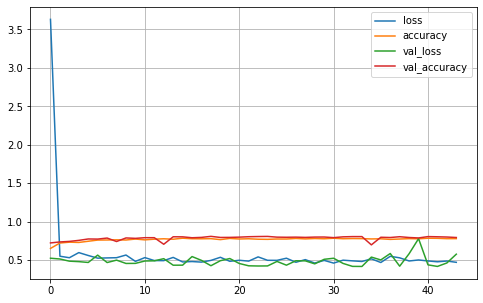

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
pred = func.predict(X_train)
y_pred_func = []
for element in pred:
    if element > 0.5:
        y_pred_func.append(1)
    else :
        y_pred_func.append(0)

In [ ]:
print(classification_report(y_train, y_pred_func))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3717
           1       0.71      0.34      0.46      1337

    accuracy                           0.79      5054
   macro avg       0.76      0.64      0.66      5054
weighted avg       0.78      0.79      0.76      5054



#VIII Model Evaluation

##Data Validation

In [ ]:
print('1.ANN SEQUENTIAL API:')
pred_seq = seq.predict(X_val)
yseq = []
for element in pred_seq:
    if element > 0.5:
        yseq.append(1)
    else :
        yseq.append(0)
print(classification_report(y_val, yseq))
print('--------------------------------------------------\n')

print('2. ANN FUCNTIONAL API:')
pred_func = func.predict(X_val)
yfunc = []
for element in pred_func:
    if element > 0.5:
        yfunc.append(1)
    else :
        yfunc.append(0)
print(classification_report(y_val, yfunc))
print('--------------------------------------------------\n')

1.ANN SEQUENTIAL API:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       930
           1       0.67      0.53      0.59       334

    accuracy                           0.81      1264
   macro avg       0.76      0.72      0.73      1264
weighted avg       0.80      0.81      0.80      1264

--------------------------------------------------

2. ANN FUCNTIONAL API:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       930
           1       0.74      0.34      0.46       334

    accuracy                           0.79      1264
   macro avg       0.77      0.65      0.67      1264
weighted avg       0.78      0.79      0.76      1264

--------------------------------------------------



##Data Test

In [ ]:
print('1.ANN SEQUENTIAL API:')
pred_seq = seq.predict(X_test)
yseq = []
for element in pred_seq:
    if element > 0.5:
        yseq.append(1)
    else :
        yseq.append(0)
print(classification_report(y_test, yseq))
print('--------------------------------------------------\n')

print('2. ANN FUCNTIONAL API:')
pred_func = func.predict(X_test)
yfunc = []
for element in pred_func:
    if element > 0.5:
        yfunc.append(1)
    else :
        yfunc.append(0)
print(classification_report(y_test, yfunc))
print('--------------------------------------------------\n')

1.ANN SEQUENTIAL API:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       517
           1       0.65      0.55      0.59       186

    accuracy                           0.80       703
   macro avg       0.75      0.72      0.73       703
weighted avg       0.79      0.80      0.80       703

--------------------------------------------------

2. ANN FUCNTIONAL API:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       517
           1       0.74      0.30      0.43       186

    accuracy                           0.79       703
   macro avg       0.76      0.63      0.65       703
weighted avg       0.78      0.79      0.75       703

--------------------------------------------------



#IX Model Improvement

* Berdasarkan hasil Training, Validation dan Test maka akan diambil model sequential dikarenakan hasil recall dan precission model sequential lebih baik dari model functional 
* Untuk improvement akan dicoba dengan menambahkan hidden layer, dropout, dan epoch pada model sequential 

In [ ]:
seq_update = tf.keras.Sequential([     
   normalizer,              
   tf.keras.layers.Dense(48, kernel_initializer = 'uniform', activation='relu'),
   tf.keras.layers.Dense(32, activation='relu'), 
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(16, activation='relu'), 
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(8, activation='relu'), 
   tf.keras.layers.Dense(1, activation='sigmoid')                         
])

seq_update.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics = ['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
history = seq_update.fit(X_train, y_train, epochs=250, batch_size=5, verbose = 1,
                    validation_data = (X_val, y_val), callbacks=[early_stop])

Epoch 1/250
1011/1011 [==============================] - 4s 4ms/step - loss: 0.6293 - accuracy: 0.6953 - val_loss: 0.5145 - val_accuracy: 0.7358
Epoch 2/250
1011/1011 [==============================] - 4s 4ms/step - loss: 0.5144 - accuracy: 0.7376 - val_loss: 0.4485 - val_accuracy: 0.7358
Epoch 3/250
1011/1011 [==============================] - 4s 4ms/step - loss: 0.4847 - accuracy: 0.7376 - val_loss: 0.4391 - val_accuracy: 0.7358
Epoch 4/250
1011/1011 [==============================] - 3s 3ms/step - loss: 0.4795 - accuracy: 0.7426 - val_loss: 0.4366 - val_accuracy: 0.7358
Epoch 5/250
1011/1011 [==============================] - 4s 3ms/step - loss: 0.4625 - accuracy: 0.7459 - val_loss: 0.4351 - val_accuracy: 0.7358
Epoch 6/250
1011/1011 [==============================] - 4s 4ms/step - loss: 0.4616 - accuracy: 0.7543 - val_loss: 0.4332 - val_accuracy: 0.7840
Epoch 7/250
1011/1011 [==============================] - 4s 3ms/step - loss: 0.4572 - accuracy: 0.7695 - val_loss: 0.4308 - val_ac

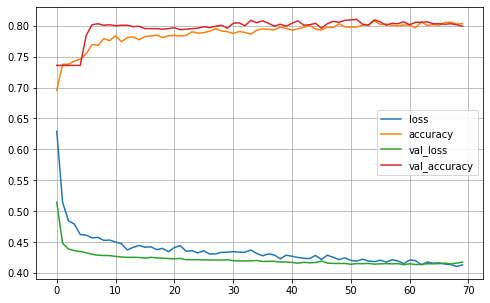

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
pred = seq_update.predict(X_train)
y_pred_seq = []
for element in pred:
    if element > 0.5:
        y_pred_seq.append(1)
    else :
        y_pred_seq.append(0)
print(classification_report(y_train, y_pred_seq))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3717
           1       0.64      0.66      0.65      1337

    accuracy                           0.81      5054
   macro avg       0.76      0.76      0.76      5054
weighted avg       0.81      0.81      0.81      5054



In [ ]:
pred = seq_update.predict(X_val)
y_pred_seq = []
for element in pred:
    if element > 0.5:
        y_pred_seq.append(1)
    else :
        y_pred_seq.append(0)
print(classification_report(y_val, y_pred_seq))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       930
           1       0.62      0.61      0.62       334

    accuracy                           0.80      1264
   macro avg       0.74      0.74      0.74      1264
weighted avg       0.80      0.80      0.80      1264



In [ ]:
pred = seq_update.predict(X_test)
y_pred_seq = []
for element in pred:
    if element > 0.5:
        y_pred_seq.append(1)
    else :
        y_pred_seq.append(0)
print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       517
           1       0.62      0.62      0.62       186

    accuracy                           0.80       703
   macro avg       0.74      0.74      0.74       703
weighted avg       0.80      0.80      0.80       703



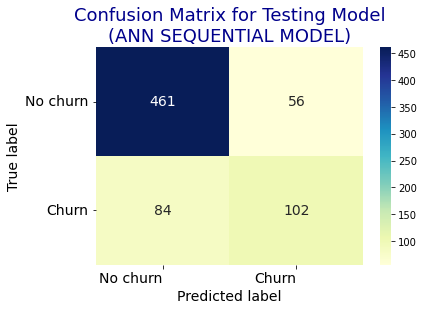

In [ ]:
# Form confusion matrix as a DataFrame
#Sequential Model 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, yseq)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(ANN SEQUENTIAL MODEL)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

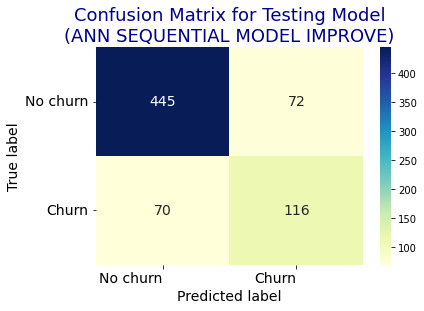

In [ ]:
# Form confusion matrix as a DataFrame
#Sequential Model Update
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_seq)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(ANN SEQUENTIAL MODEL IMPROVE)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#X Save Model

In [ ]:
seq_update.save("Churn_model",save_format='tf')

In [ ]:
! ls

Churn_model.h5	model.png  sample_data


In [ ]:
model = keras.models.load_model("Churn_model")

In [ ]:
new_data=[[0,	0,	0,	0,	0,	0,	0,	0,	0,	0	,0,	0	,1889.50]]

In [ ]:
pred = model.predict(new_data)
print(pred)

if (pred>0.5):
  print("Customer churn")
else:
  print("Customer not churn")

[[1.]]
Customer churn


In [ ]:
!zip -r /content/file.zip /content/Churn_model

  adding: content/Churn_model/ (stored 0%)
  adding: content/Churn_model/saved_model.pb (deflated 88%)
  adding: content/Churn_model/keras_metadata.pb (deflated 90%)
  adding: content/Churn_model/variables/ (stored 0%)
  adding: content/Churn_model/variables/variables.data-00000-of-00001 (deflated 19%)
  adding: content/Churn_model/variables/variables.index (deflated 67%)
  adding: content/Churn_model/assets/ (stored 0%)


#Kesimpulan

##EDA
* Pelanggan yang churn cenderung yang tenure dan totalcharge rendah, jika berdasarkan dua kolom tersebut bisa dikatakan pelanggan churn adalah pelanggan yang baru bergabung
* Untuk MonthlyCharges pelanggan yang membayar lebih murah cenderung tidak churn
* Berdasarkan Payment Method pelanggan churn paling banyak dengan metode pembayaran  dengan  Electronic Check
* Berdasarkan Contract pelanggan churn paling banyak dengan contract Month to Month
* Berdasarkna data demografik , pelanggan churn lebih banyak yang tidak memiliki partner dan No Dependents (tidak memiliki tanggungan)
* Jika dilihat dari phone dan internet service pelanggan churn banyak yang memiliki phoneservice dan internetservice menggunakan fiberoptic
* Jika dilihat dari fitur service pelanggan yang churn cenderung yang tidak memiliki onlinesecurity,onlinebackup, deviceprotection, dan techsupport
* Jika dilihat dari fitur Stream pelanggan yang churn cenderung tidak memiliki StreamingTV dan StreamingMovies


---
Berdasarkan fitur korelasi 'gender', 'PhoneService' , 'MultipleLines' ,'InternetService', 'StreamingTV','StreamingMovies' memiliki korelasi yang sangat rendah terhadap kolom churn, sehingga kolom tersebut di drop


##Model
* Model Sequential lebih stabil dari pada model Functional
* Berdasarkan hasil Training, Validation dan Test maka akan diambil model sequential dikarenakan hasil recall dan precission model sequential lebih baik dari model functional 
* Penambahan hidden layer, dropout fitur, epoch cukup mempengaruhi model, terbukti hasil train dan validation nya lebih baik
* Model Sequential yang sudah di improve bisa menentukan pelanggan churn lebih baik dari pada model sequential yang basic